## Predicting the kind of tissues excised from breast on the basis of electrical impedance mesurements using __DecisionTreeClassifier__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tissue = pd.read_csv("TissueData.csv")

In [3]:
tissue.head()

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701813
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


## taking a feature set

In [4]:
X = tissue[['I0','Class','PA500','HFS','DA','Area','A/DA','Max IP','DR','P']].values
X[0:5]

array([[524.794072, 'car', 0.18744836199999998, 0.032114058, 228.8002279,
        6843.598481, 29.91080273, 60.20487976, 220.737212, 556.8283342],
       [330.0, 'car', 0.226892803, 0.265290046, 121.1542007,
        3163.2394719999998, 26.10920178, 69.71736145, 99.084964,
        400.225776],
       [551.8792874, 'car', 0.232477856, 0.063529985, 264.80493540000003,
        11888.39183, 44.89490276, 77.79329681, 253.78529980000002,
        656.7694494],
       [380.0, 'car', 0.240855437, 0.286233997, 137.64011090000002,
        5402.171179999999, 39.2485239, 88.75844574, 105.198568,
        493.70181349999996],
       [362.8312659, 'car', 0.200712864, 0.244346095, 124.9125594,
        3290.462446, 26.34212655, 69.38938904, 103.8665519, 424.7965034]],
      dtype=object)

### converting class names to int

In [5]:
from sklearn import preprocessing
le_class = preprocessing.LabelEncoder()
le_class.fit(['car','fad','mas','gla','con','adi'])
X[:,1] = le_class.transform(X[:,1])
X[0:5]

array([[524.794072, 1, 0.18744836199999998, 0.032114058, 228.8002279,
        6843.598481, 29.91080273, 60.20487976, 220.737212, 556.8283342],
       [330.0, 1, 0.226892803, 0.265290046, 121.1542007,
        3163.2394719999998, 26.10920178, 69.71736145, 99.084964,
        400.225776],
       [551.8792874, 1, 0.232477856, 0.063529985, 264.80493540000003,
        11888.39183, 44.89490276, 77.79329681, 253.78529980000002,
        656.7694494],
       [380.0, 1, 0.240855437, 0.286233997, 137.64011090000002,
        5402.171179999999, 39.2485239, 88.75844574, 105.198568,
        493.70181349999996],
       [362.8312659, 1, 0.200712864, 0.244346095, 124.9125594,
        3290.462446, 26.34212655, 69.38938904, 103.8665519, 424.7965034]],
      dtype=object)

## Creating a target variable

In [6]:
Y = tissue['Class']
Y[0:5]

0    car
1    car
2    car
3    car
4    car
Name: Class, dtype: object

## Setting up the decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)
print(X_trainset.shape)
print(X_testset.shape)
print(Y_trainset.shape)
print(Y_testset.shape)

(74, 10)
(32, 10)
(74,)
(32,)


## Modeling

In [10]:
# creating an instance of a decision tree
tissueTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tissueTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
tissueTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [12]:
predTree = tissueTree.predict(X_testset) 

In [13]:
print (predTree [0:5])
print (Y_testset [0:5])

['con' 'adi' 'car' 'car' 'adi']
71    con
99    adi
6     car
5     car
90    adi
Name: Class, dtype: object


## Evaluation

In [14]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  1.0


[Text(418.5, 285.39000000000004, 'X[1] <= 2.5\nentropy = 2.577\nsamples = 74\nvalue = [12, 13, 10, 12, 13, 14]'),
 Text(167.4, 203.85000000000002, 'X[0] <= 600.94\nentropy = 1.577\nsamples = 35\nvalue = [12, 13, 10, 0, 0, 0]'),
 Text(83.7, 122.31, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0, 0]'),
 Text(251.10000000000002, 122.31, 'X[1] <= 1.0\nentropy = 0.994\nsamples = 22\nvalue = [12, 0, 10, 0, 0, 0]'),
 Text(167.4, 40.76999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0, 0]'),
 Text(334.8, 40.76999999999998, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0, 0]'),
 Text(669.6, 203.85000000000002, 'X[1] <= 4.5\nentropy = 1.582\nsamples = 39\nvalue = [0, 0, 0, 12, 13, 14]'),
 Text(585.9, 122.31, 'X[1] <= 3.5\nentropy = 0.999\nsamples = 25\nvalue = [0, 0, 0, 12, 13, 0]'),
 Text(502.20000000000005, 40.76999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0, 0]'),
 Text(669.6, 40.76999999999998, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0,

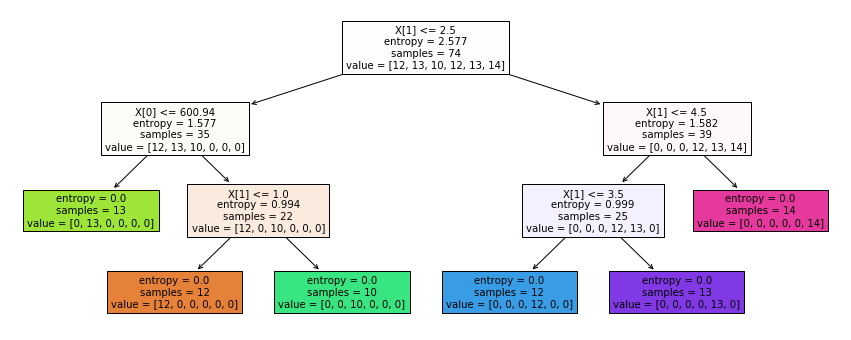

In [15]:
from sklearn import tree
plt.figure(figsize=(15,6))
tree.plot_tree(tissueTree, filled=True)

### To rectify the accuracy

In [16]:
path = tissueTree.cost_complexity_pruning_path(X_trainset, Y_trainset)
ccp_alphas,impurities = path.ccp_alphas, path.impurities

In [17]:
ccp_alphas

array([0.        , 0.2955225 , 0.33744782, 0.45015802, 0.49636909,
       0.99789131])

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    tissueTree = DecisionTreeClassifier(random_state=3, ccp_alpha=ccp_alpha)
    tissueTree.fit(X_trainset, Y_trainset)
    clfs.append(tissueTree)
print("no. of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

no. of nodes in the last tree is: 1 with ccp_alpha: 0.9978913098356861


## Accuracy vs alpha for training and testing sets

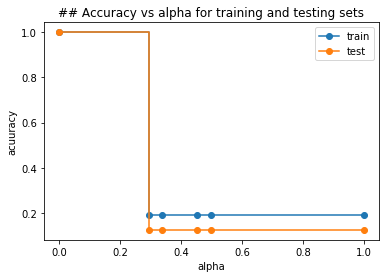

In [19]:
train_scores = [tissueTree.score(X_trainset, Y_trainset) for tissueTree in clfs]
test_scores = [tissueTree.score(X_testset, Y_testset) for tissueTree in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('acuuracy')
ax.set_title('## Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [20]:
tissueTree = DecisionTreeClassifier(criterion= 'entropy',random_state=0, ccp_alpha=0.012)
tissueTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy', random_state=0)

In [21]:
pred = tissueTree.predict(X_testset)
from sklearn.metrics import accuracy_score
accuracy_score(Y_testset, pred)

1.0

[Text(418.5, 285.39000000000004, 'X[1] <= 2.5\nentropy = 2.577\nsamples = 74\nvalue = [12, 13, 10, 12, 13, 14]'),
 Text(167.4, 203.85000000000002, 'X[0] <= 600.94\nentropy = 1.577\nsamples = 35\nvalue = [12, 13, 10, 0, 0, 0]'),
 Text(83.7, 122.31, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0, 0]'),
 Text(251.10000000000002, 122.31, 'X[1] <= 1.0\nentropy = 0.994\nsamples = 22\nvalue = [12, 0, 10, 0, 0, 0]'),
 Text(167.4, 40.76999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0, 0]'),
 Text(334.8, 40.76999999999998, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0, 0]'),
 Text(669.6, 203.85000000000002, 'X[1] <= 4.5\nentropy = 1.582\nsamples = 39\nvalue = [0, 0, 0, 12, 13, 14]'),
 Text(585.9, 122.31, 'X[1] <= 3.5\nentropy = 0.999\nsamples = 25\nvalue = [0, 0, 0, 12, 13, 0]'),
 Text(502.20000000000005, 40.76999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0, 0]'),
 Text(669.6, 40.76999999999998, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0,

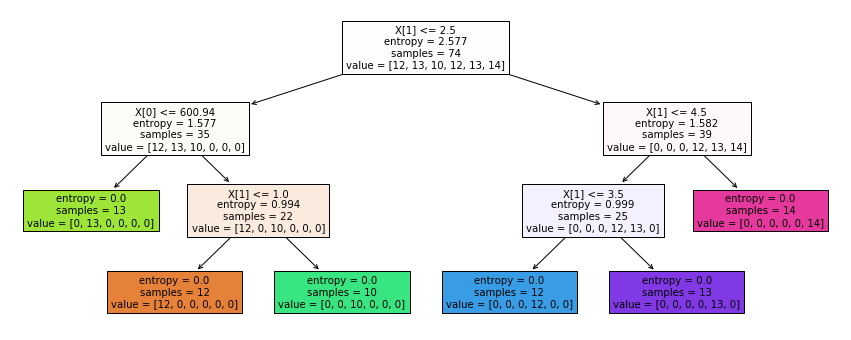

In [22]:
from sklearn import tree
plt.figure(figsize=(15,6))
tree.plot_tree(tissueTree,filled=True)

## Saving the model

In [23]:
model = DecisionTreeClassifier()

In [24]:
from joblib import dump, load
dump(tissueTree, 'Tissue.joblib')

['Tissue.joblib']

## Using the model

In [25]:
from joblib import dump, load
tissueTree = load('Tissue.joblib')
import numpy as np
features = ([[985.664721, 2, 0.092327917, 0.089360858, 202.48004369999998,
        8785.028733, 43.38713372, 0.0921936, 143.25778,
        1524.6092039999999]])
tissueTree.predict(features)

array(['con'], dtype=object)